In [1]:
import torch
import torch.nn.functional as F
from pytorch_lightning import Trainer
from datamodules.mat_datamodules import MatDataModule
from models.lit_unet import LitUNet
from torchvision.transforms import Compose
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import torchvision.transforms as transforms

In [2]:
# class MaxAbsScaler:
#     def __init__(self, max_abs_value):
#         self.max_abs_value = max_abs_value
#     def __call__(self, tensor):
#         return tensor / self.max_abs_value

In [3]:
# max_abs_value_input = 1.2040270566940308
# max_abs_value_tgt = 0.7881543636322021

# max_abs_scaler_input = MaxAbsScaler(max_abs_value=max_abs_value_input)
# max_abs_scaler_tgt = MaxAbsScaler(max_abs_value=max_abs_value_tgt)

train_transform_input = Compose([
        # max_abs_scaler_input,
    ])

train_transform_tgt = Compose([
        # max_abs_scaler_tgt,
    ])

val_test_transform_input = Compose([
        # max_abs_scaler_input,
    ])

val_test_transform_tgt = Compose([
        # max_abs_scaler_tgt,
    ])


In [4]:
datamodule = MatDataModule(
        data_dir='data',
        train_transform=None,
        val_test_transform=None,
        batch_size=32,
        num_workers=4,
        seed=42
    )


In [7]:
best_model_path = "checkpoints/UnetPlusPlus/best-checkpoint-epoch=14-val_loss=0.0006.ckpt"

model = LitUNet(loss_fn=F.mse_loss, learning_rate=1e-4)

checkpoint = torch.load(best_model_path, map_location=torch.device('cuda'))
model.load_state_dict(checkpoint['state_dict'])

trainer = Trainer()
trainer.test(model=model, datamodule=datamodule)

Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]


Testing DataLoader 0: 100%|██████████| 63/63 [00:21<00:00,  2.90it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_loss          0.0012234169989824295
         test_r2            0.7681547999382019
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 0.0012234169989824295, 'test_r2': 0.7681547999382019}]

In [6]:
test_gt = model.test_gt
test_outputs = model.test_outputs

In [8]:
gt_flatten = []
for batch in test_gt:
    gt_flatten.extend(batch.detach().cpu().numpy().flatten())


In [9]:
pred_flatten = []
for batch in test_outputs:
    pred_flatten.extend(batch.detach().cpu().numpy().flatten())

In [10]:
gt_flatten = np.array(gt_flatten)
pred_flatten = np.array(pred_flatten)

In [11]:
np.sum(gt_flatten)
gt_flatten

array([0., 0., 0., ..., 0., 0., 0.], shape=(131072000,), dtype=float32)

In [12]:
pred_flatten[gt_flatten==0]

array([-0.00445481,  0.00140091,  0.0005529 , ..., -0.00153971,
       -0.00297083, -0.00602255], shape=(104818136,), dtype=float32)

In [13]:
# plt.scatter(gt_flatten[gt_flatten==0], pred_flatten[gt_flatten==0], alpha=0.1)
r2_score(gt_flatten[gt_flatten==0], pred_flatten[gt_flatten==0])

0.0

In [14]:
# plt.scatter(gt_flatten[gt_flatten!=0], pred_flatten[gt_flatten!=0], alpha=0.1) 
r2_score(gt_flatten[gt_flatten!=0], pred_flatten[gt_flatten!=0])

0.7676597833633423

In [34]:
test_outputs[0].shape

torch.Size([32, 1, 256, 256])

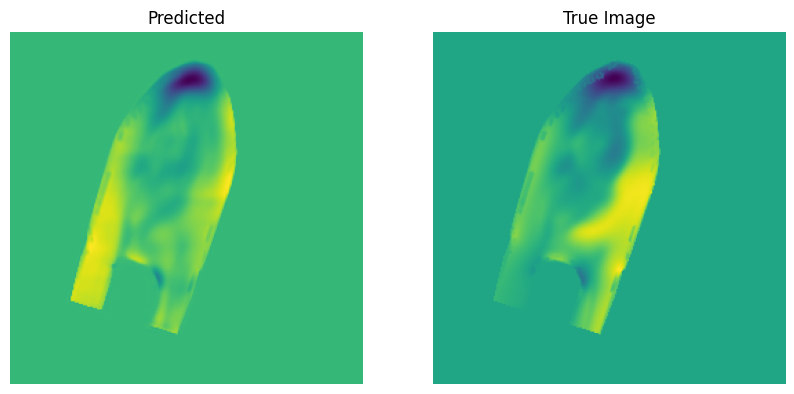

: 

In [24]:
i = 11

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(test_outputs[0][i][0].cpu())
plt.title("Predicted")
plt.axis("off")

plt.subplot(1, 2, 2)  # 1行2列の2枚目
plt.imshow(test_gt[0][i][0].cpu())
plt.title("True Image")
plt.axis("off")

plt.show()

In [9]:
y_true = result['y_true']
y_pred = result['y_pred']

TypeError: list indices must be integers or slices, not str

In [5]:
datamodule.setup()
train_dataset = np.array(datamodule.train_dataset)
val_dataset = np.array(datamodule.val_dataset)
test_dataset = np.array(datamodule.test_dataset)

In [13]:
def show_distribution(dataset):
    flatten_input_data = dataset[:, 0, ...].flatten()
    flatten_output_data = dataset[:, 1, ...].flatten()
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(flatten_input_data[flatten_input_data!=0], bins=100, alpha=0.5, label='input')
    plt.subplot(1, 2, 2)
    plt.hist(flatten_output_data[flatten_output_data!=0], bins=100, alpha=0.5, label='output')

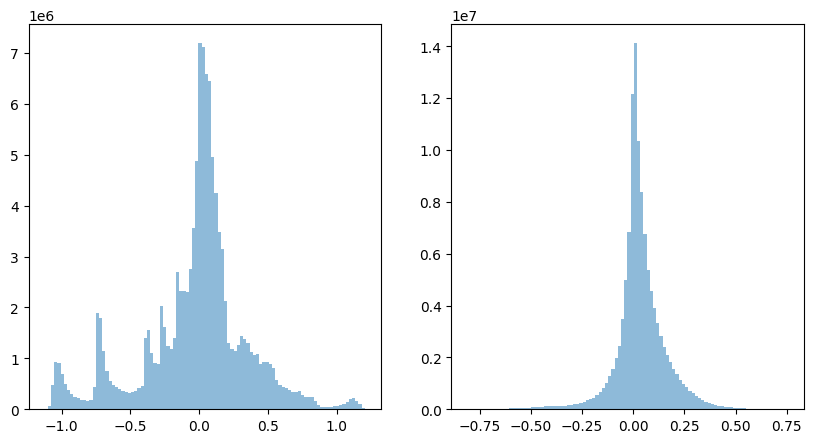

In [20]:
show_distribution(train_dataset)

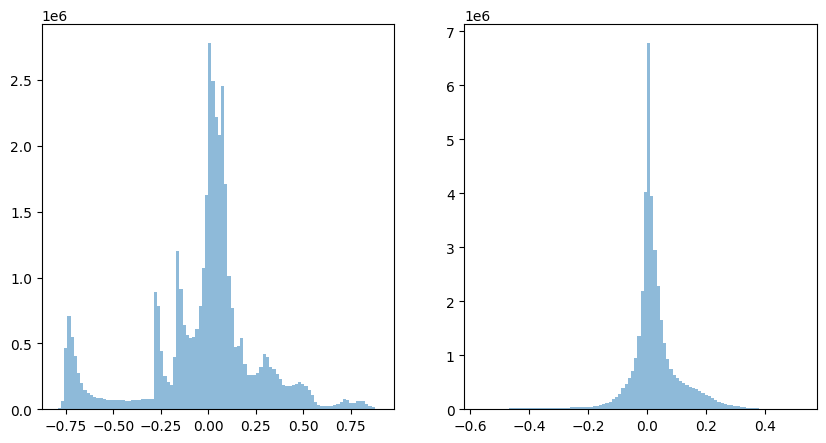

In [15]:
show_distribution(train_dataset[:3000])

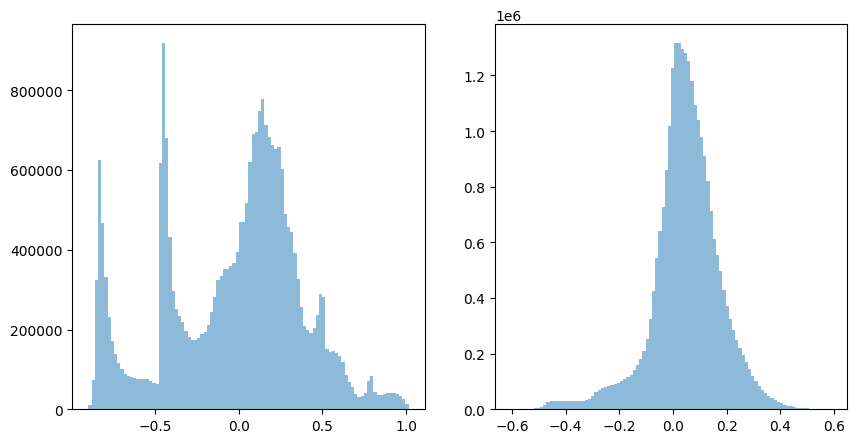

In [21]:
show_distribution(val_dataset)

In [10]:
a = train_dataset[:1000]
b = np.concatenate([test_dataset, a], axis=0)

In [11]:
b

array([[[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]],


        [[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]]],



       [[[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.]]],


        [[[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., .

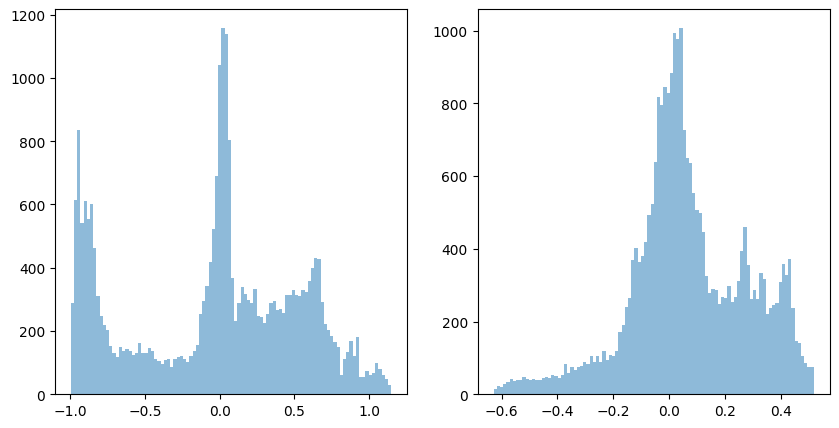

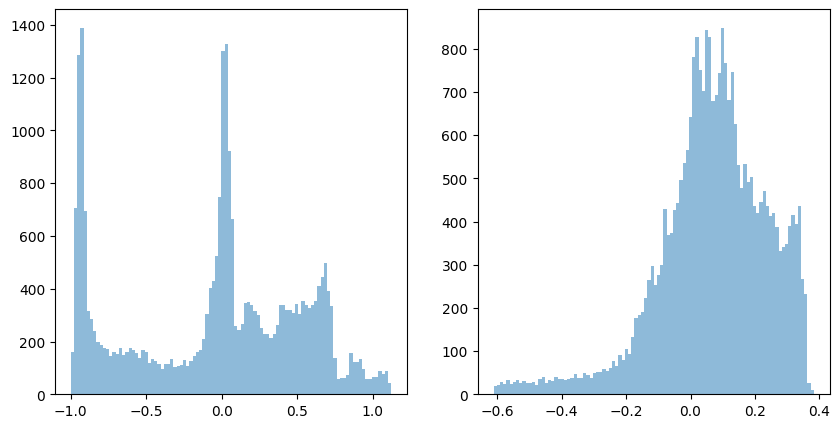

In [18]:
show_distribution(test_dataset[:2])
show_distribution(test_dataset[3:5])

In [ ]:
train_dataset